# AYKIRI GÖZLEM ANALİZİ

# Aykırı Değerleri Yakalamak

In [1]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])
df = df.dropna()
df.head()

carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75

In [1]:
?

Object `series` not found.


In [2]:
df_table = df["table"]

In [3]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

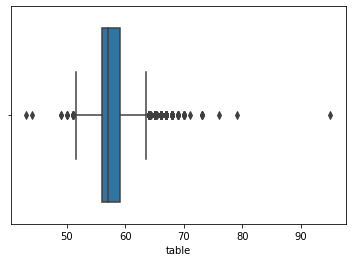

In [4]:
sns.boxplot(x = df_table);

In [5]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [6]:
Q1

56.0

In [7]:
Q3

59.0

In [8]:
IQR

3.0

In [12]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [13]:
alt_sinir

51.5

In [14]:
ust_sinir

63.5

In [17]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [18]:
aykiri_tf = (df_table < alt_sinir)

In [19]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [20]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [21]:
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

# Aykırı Değer Problemini Çözmek

# silme

In [22]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [23]:
import pandas as pd

In [24]:
type(df_table)

pandas.core.series.Series

In [25]:
df_table = pd.DataFrame(df_table)

In [26]:
df_table.shape

(53940, 1)

In [31]:
t_df = df_table[~ ((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]

In [32]:
t_df.shape

(53335, 1)

# ortalama ile doldurma

In [33]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])
df = df.dropna()
df.head()

carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75

In [34]:
df_table = df["table"]

In [36]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [37]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [38]:
df_table.mean()

57.45718390804603

In [41]:
df_table[aykiri_tf] = df.table.mean()

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

# baskılama yöntemi

In [43]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])
df = df.dropna()
df.head()

carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75

In [45]:
df_table = df["table"]

In [46]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [47]:
alt_sinir

51.5

In [48]:
df_table[aykiri_tf] = alt_sinir

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

# Çok Değişkenli Aykırı Gözlem Analizi

In [54]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
diamonds = diamonds.select_dtypes(include = ["float64","int64"])
df = diamonds.copy()
df = df.dropna()
df.head()

carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75

In [55]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [57]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [58]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [60]:
df_scores = clf.negative_outlier_factor_

In [62]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [67]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [68]:
np.sort(df_scores)[13]

-3.823787967755565

In [69]:
esik_deger = np.sort(df_scores)[13]

In [70]:
aykiri_tf = df_scores > esik_deger

In [71]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [73]:
yeni_df = df[df_scores > esik_deger]

In [74]:
yeni_df

carat  depth  table  price     x     y     z
0       0.23   61.5   55.0    326  3.95  3.98  2.43
1       0.21   59.8   61.0    326  3.89  3.84  2.31
2       0.23   56.9   65.0    327  4.05  4.07  2.31
3       0.29   62.4   58.0    334  4.20  4.23  2.63
4       0.31   63.3   58.0    335  4.34  4.35  2.75
...      ...    ...    ...    ...   ...   ...   ...
53935   0.72   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75   62.2   55.0   2757  5.83  5.87  3.64

[53926 rows x 7 columns]

In [75]:
# yeni_df = df[df_scores < esik_deger] aykiri olan

# baskılama

In [77]:
df[df_scores == esik_deger]

carat  depth  table  price     x    y     z
31230   0.45   68.6   57.0    756  4.73  4.5  3.19

In [78]:
baski_deger = df[df_scores == esik_deger]

In [80]:
aykirilar = df[~aykiri_tf]

In [83]:
aykirilar.to_records(index = False)

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [84]:
res = aykirilar.to_records(index = False)

In [85]:
res[:] = baski_deger.to_records(index = False)

In [86]:
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [87]:
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)

In [88]:
df[~aykiri_tf]

carat  depth  table  price     x      y      z
6341    1.00   44.0   53.0   4032  6.31   6.24   4.12
10377   1.09   43.0   54.0   4778  6.53   6.55   4.12
24067   2.00   58.9   57.0  12210  8.09  58.90   8.06
31230   0.45   68.6   57.0    756  4.73   4.50   3.19
35633   0.29   62.8   44.0    474  4.20   4.24   2.65
36503   0.30   51.0   67.0    945  4.67   4.62   2.37
38840   0.73   70.8   55.0   1049  5.51   5.34   3.84
41918   1.03   78.2   54.0   1262  5.72   5.59   4.42
45688   0.70   71.6   55.0   1696  5.47   5.28   3.85
48410   0.51   61.8   54.7   1970  5.12   5.15  31.80
49189   0.51   61.8   55.0   2075  5.15  31.80   5.12
50773   0.81   68.8   79.0   2301  5.26   5.20   3.58
52860   0.50   79.0   73.0   2579  5.21   5.18   4.09
52861   0.50   79.0   73.0   2579  5.21   5.18   4.09

# EKSİK VERİ